Code for Linear Regression: Predicting the price a customer is willing to pay for a car based on a few information given or known about the customer; such as age, annual salary, debt, and net worth

In [1]:
##import some python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


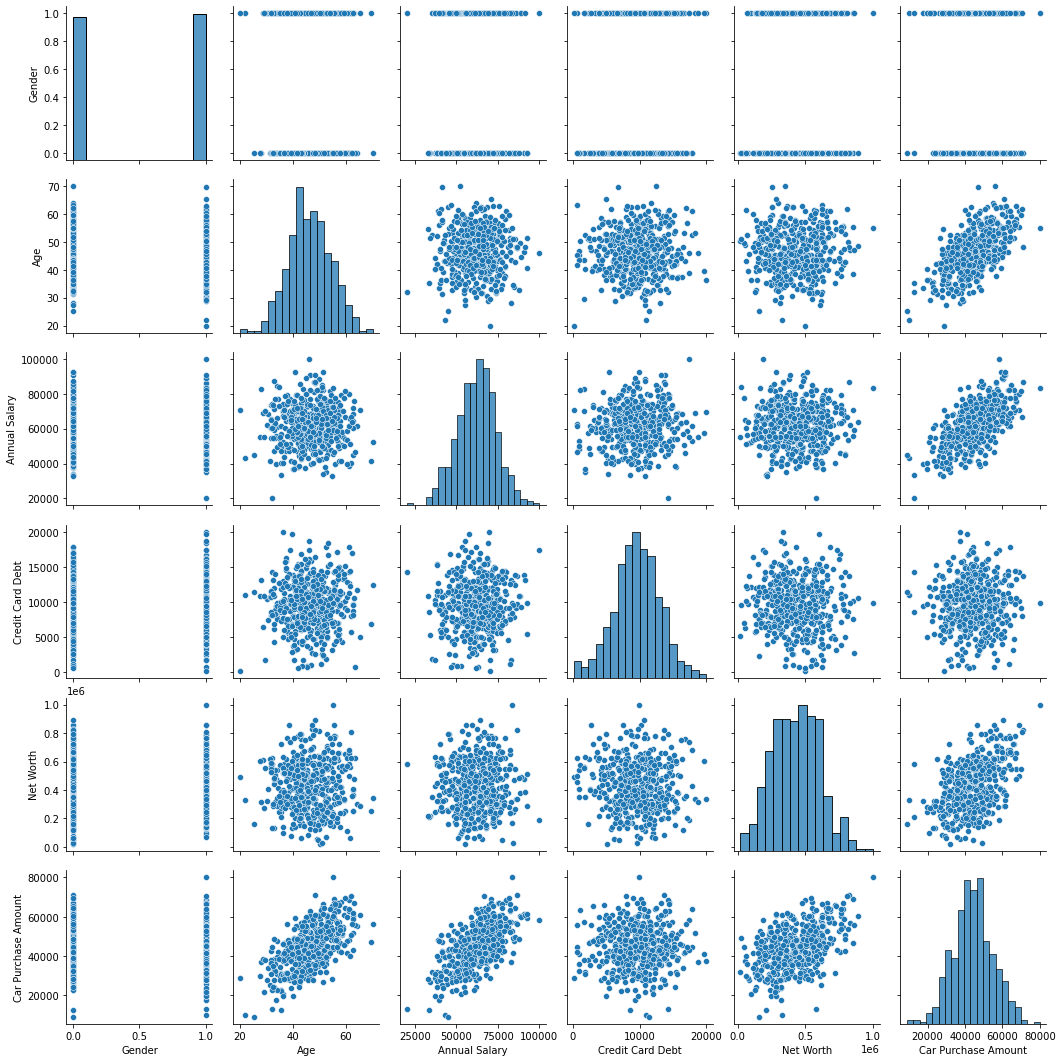

In [4]:
sns.pairplot(car_df)

In [5]:
##personal choice effect
sns.set_style('darkgrid')
sns.set_palette('bone')
pd.options.display.float_format = '{:,.3f}'.format

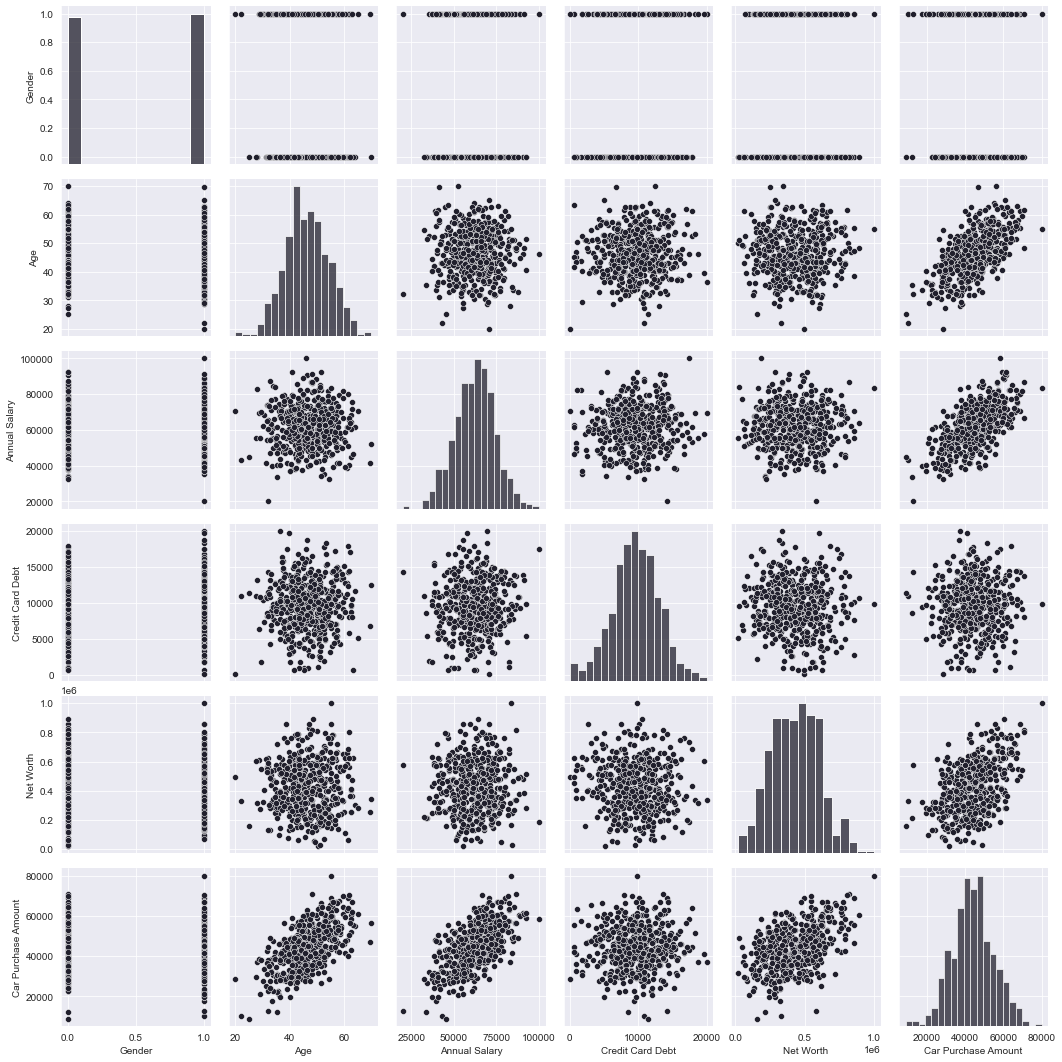

In [6]:
sns.pairplot(car_df)

Having imported our data, we need to 'clean' the data-set, drop some unneccessary columns, and modify some datatypes where needed. Note: the columns dropped are the ones we think might not affect the pricing, this decision is by choice and may vary from one developer to another ie, some might think Gender or Country affects pricing and thus include the Gender and Country columns, while some might not think so

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [8]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

In [9]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.852,"62,812.093","11,609.381","238,961.250","35,321.459"
1,0,40.871,"66,646.893","9,572.957","530,973.908","45,115.526"
2,1,43.153,"53,798.551","11,160.355","638,467.177","42,925.709"
3,1,58.271,"79,370.038","14,426.165","548,599.052","67,422.363"
4,1,57.314,"59,729.151","5,358.712","560,304.067","55,915.462"


In [10]:
#drop the output column also
X = X.drop(['Car Purchase Amount'], axis=1)

In [11]:
#creat output column as df
y = car_df['Car Purchase Amount']

In [12]:
print(X.shape,y.shape)

(500, 5) (500,)


Perform Feature Scaling on X to normalize the entire dataset to some scaling or range.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [15]:
X_scaled.shape

(500, 5)

In [16]:
scaler.data_max_ ##the max values for input columns

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [17]:
scaler.data_min_ ##the min values for input columns

array([    0.,    20., 20000.,   100., 20000.])

In [18]:
y = y.values.reshape(-1,1)
y.shape

(500, 1)

In [19]:
y_scaled = scaler.fit_transform(y)

Training the model: this is initialized by splitting the dataset in two, a training part and a testing part(this part is never used during training)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled) #default value of split is 0.25 of test size

In [21]:
#### for a test size of 40%...
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.4)

In [22]:
X_train.shape

(375, 5)

In [23]:
X_test.shape

(125, 5)

In [24]:
y_train.shape

(375, 1)

In [25]:
y_test.shape

(125, 1)

In [26]:
##Build the model
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [28]:
##pre-training
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [29]:
##Train the model
epochs_hist = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2743 - val_loss: 0.2103
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1522 - val_loss: 0.1091
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0737 - val_loss: 0.0503
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.0234
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0163
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0169
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0159
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.0137
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0126
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0125
Epoch 11/50
6/6 [=====================

Evaluation of the model

In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation loss')

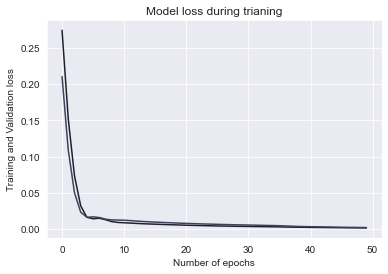

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss during trianing')
plt.xlabel('Number of epochs')
plt.ylabel('Training and Validation loss')


We can change different measures and parameters to see their effects and changes, for instance the number of epochs or the percentage of train to test data, or the number of hidden layers. In any case, a little change might lead to a whole different outcome, some might be too much time to train or achieve atability, while some lower error values.

Testing the model...

In [32]:
##testing a prediction from a random customer
test = np.array([[1, 45, 10000, 20000, 500000]])
test_predict = model.predict(test)

In [33]:
print('Expected Purchase Amount', test_predict);

Expected Purchase Amount [[192750.44]]


In [34]:
#testing from our test dataset
y_predict =  model.predict(X_test)